In [1]:
from youtube_api import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

ModuleNotFoundError: No module named 'youtube_api'

In [196]:
def normalize_videos_data(videos):
    categories = get_categories()

    for video in videos:
        category_id = video['categoryId']
        category_name = categories[category_id]
        video['categoryName'] = category_name

    return videos

In [197]:
before_covid_videos = read_data_from_file('before_covid_videos.txt')
simplified_before_covid_videos = simplify_videos_data(before_covid_videos, required_properties)
simplified_before_covid_videos = normalize_videos_data(simplified_before_covid_videos)

after_covid_videos = read_data_from_file('after_covid_videos.txt')
simplified_after_covid_videos = simplify_videos_data(after_covid_videos, required_properties)
simplified_after_covid_videos = normalize_videos_data(simplified_after_covid_videos)

In [265]:
before = pd.DataFrame(simplified_before_covid_videos)
after = pd.DataFrame(simplified_after_covid_videos)
after['publishedAt'] = pd.to_datetime(after['publishedAt'])
before['publishedAt'] = pd.to_datetime(before['publishedAt'])
after = after.sort_values('publishedAt', ascending=True)
before = before.sort_values('publishedAt', ascending=True)
after_like_count = after.copy()
before_like_count = before.copy()
after_view_count = after.copy()
before_view_count = before.copy()
after_comment_count = after.copy()
before_comment_count = before.copy()
after_dislike_count = after.copy()
before_dislike_count = before.copy()

before

,publishedAt,title,categoryId,duration,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,location,categoryName
351,2019-03-01 16:05:11+00:00,Taraftar : Hodri Meydan | Kocaelispor Taraftar...,24,PT12M12S,61844,1958,45,0,157,"{'latitude': 40.7654408, 'longitude': 29.94080...",Entertainment
419,2019-03-02 23:17:50+00:00,HAMİLELİKTE EGZERSİZ NASIL YAPILMALIDIR? HANGİ...,27,PT2M31S,39532,215,12,0,5,"{'latitude': 41.0757881, 'longitude': 29.01946...",Education
89,2019-03-03 10:57:39+00:00,TekMill - Çakal (Official Video),10,PT2M47S,747634,13780,1648,0,2305,"{'latitude': 38.963745, 'longitude': 35.243322...",Music
25,2019-03-08 12:39:48+00:00,"YILLARDIR SAKLANAN TARİFİYLE İNEGÖL KÖFTE,BU T...",22,PT13M37S,2443067,29972,2287,0,2084,"{'latitude': 39.9333635, 'longitude': 32.85974...",People & Blogs
81,2019-03-09 14:16:38+00:00,Xiaomi Mi 9 ve Samsung Galaxy S10 Ekran Kırılm...,28,PT7M56S,881444,11504,2411,0,2790,"{'latitude': 40.9929443, 'longitude': 29.03868...",Science & Technology
...,...,...,...,...,...,...,...,...,...,...,...
183,2019-11-27 13:44:52+00:00,📢 BAYAT EKMEKLERİNİZİ İSRAF ETMEYİN ❌ MANTI YA...,22,PT6M29S,246616,6024,191,0,653,"{'latitude': 36.8968908, 'longitude': 30.71332...",People & Blogs
245,2019-11-27 15:14:33+00:00,OHANNES: The Great Kebab and The Muscle Car. T...,22,PT17M59S,145566,2838,182,0,282,"{'latitude': 33.8942221, 'longitude': 35.56024...",People & Blogs
456,2019-11-28 12:17:01+00:00,What Is The Most Delicious Food In Trabzon? - ...,24,PT1M7S,19800,499,179,0,150,"{'latitude': 41.0082376, 'longitude': 28.97835...",Entertainment
327,2019-11-28 18:00:02+00:00,"KARPATHOS, Greece ► Video Guide, 51 min. Overv...",19,PT51M2S,72830,710,28,0,62,"{'latitude': 35.507574, 'longitude': 27.212199...",Travel & Events


<AxesSubplot:>

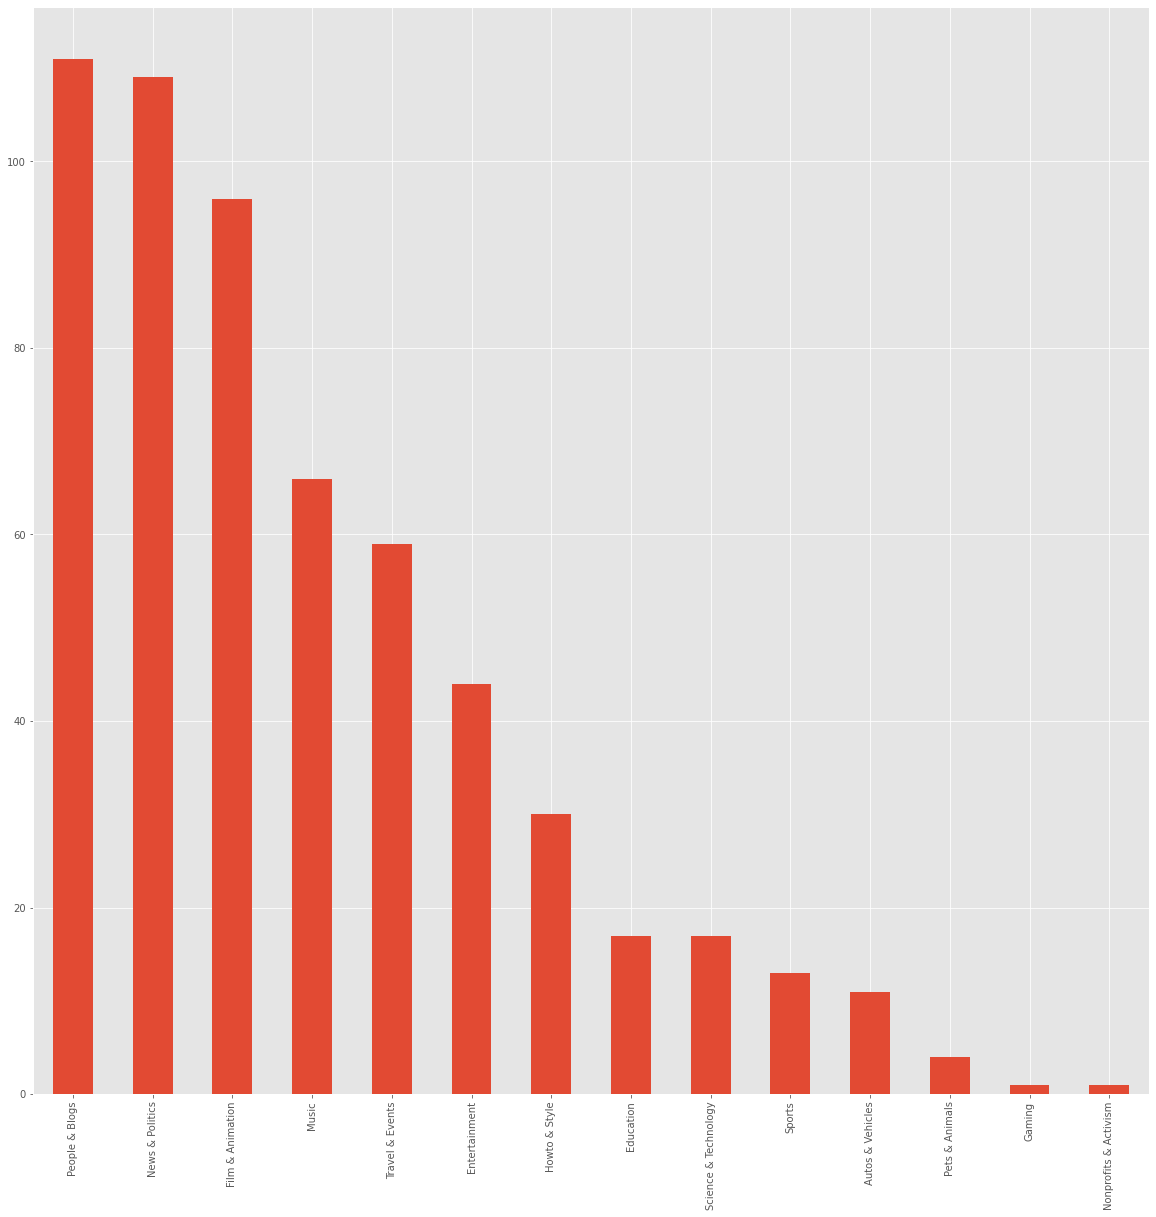

In [266]:
category_count = after.groupby('categoryName').count()
category_count_before = before.groupby('categoryName').aggregate(sum)

category_count = after['categoryName'].value_counts()
category_count_before = before['categoryName'].value_counts()

plt.figure(figsize=(20,20))

category_count.plot(kind='bar')


<AxesSubplot:>

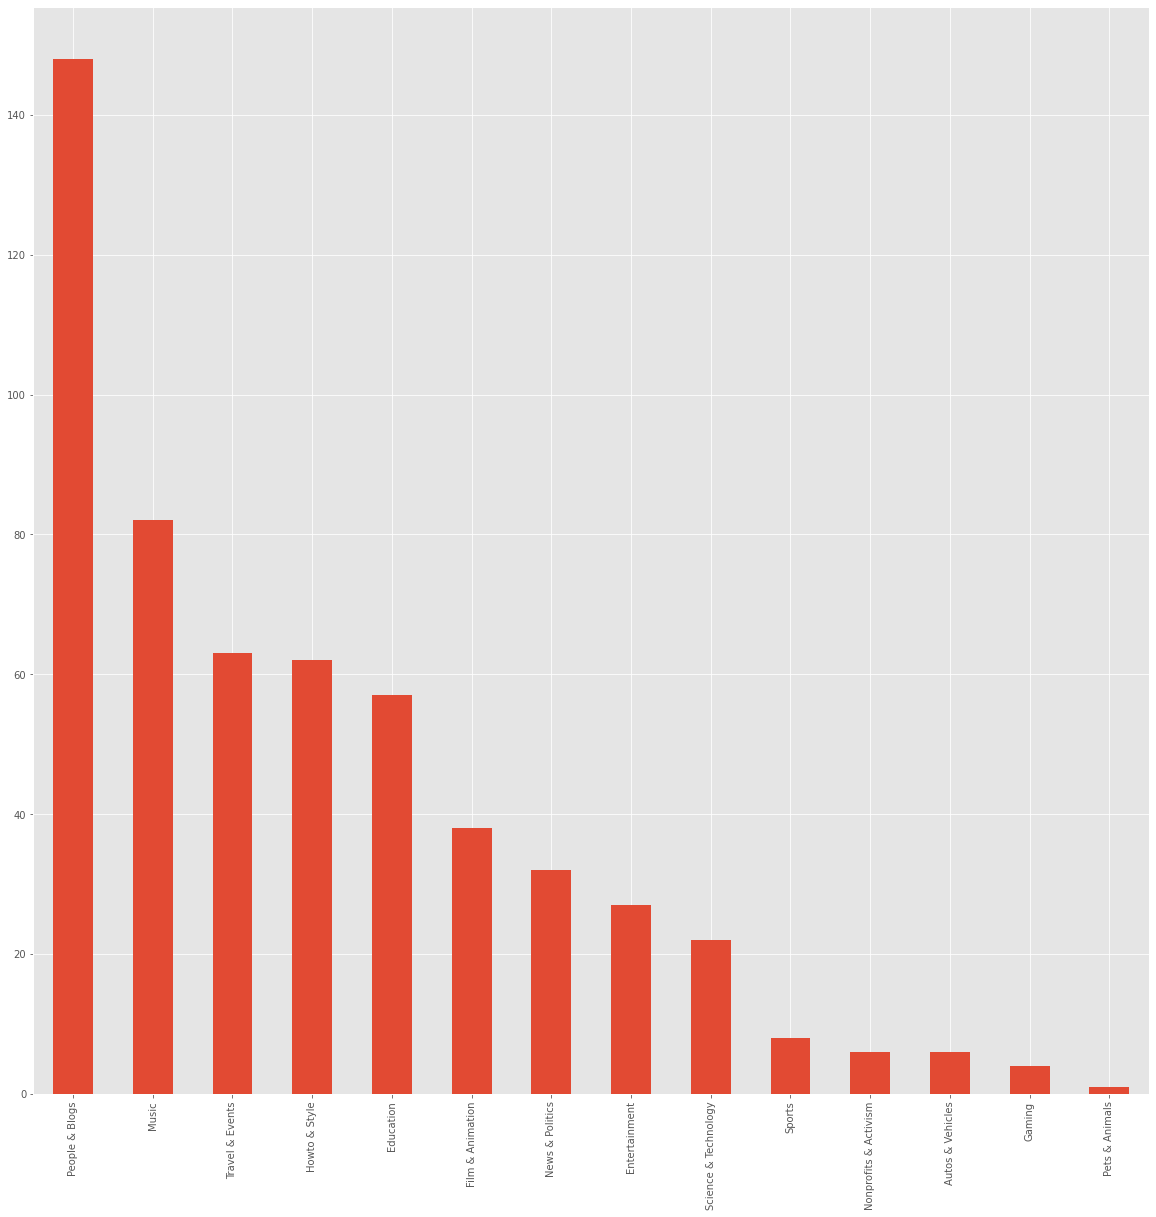

In [267]:
plt.figure(figsize=(20,20))
category_count_before.plot(kind='bar')

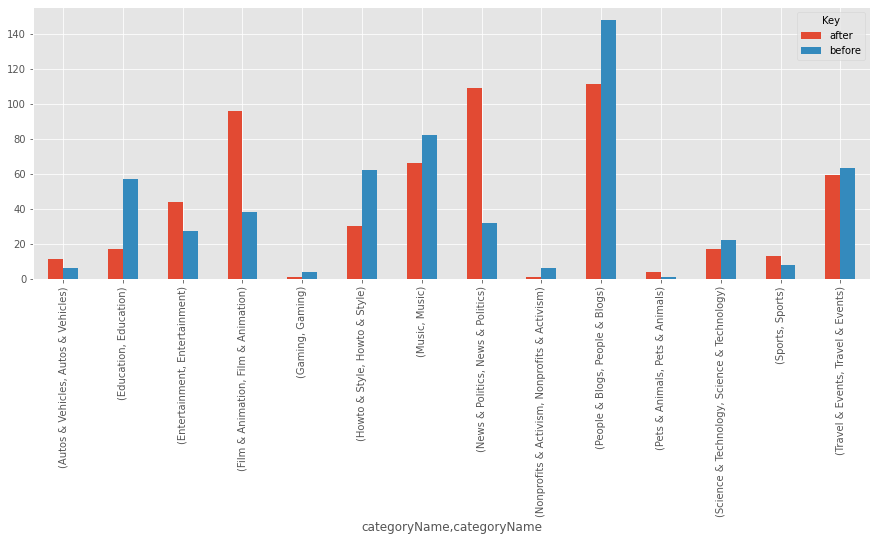

In [268]:
# compare categor
before['Key'] = 'before'
after['Key'] = 'after'

DF = pd.concat([before,after],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])
DFGroup['categoryName'].value_counts()

DFGPlot = DFGroup['categoryName'].value_counts().unstack('Key').plot(kind='bar')

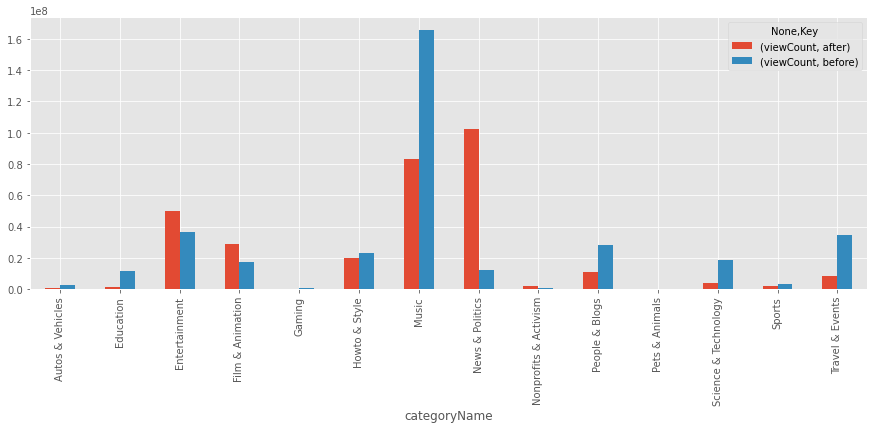

In [269]:
# compare category count according to viewcount
before_view_count['Key'] = 'before'
after_view_count['Key'] = 'after'
before_view_count['viewCount'] = pd.to_numeric(before_view_count['viewCount'])
after_view_count['viewCount'] = pd.to_numeric(after_view_count['viewCount'])

DF = pd.concat([before_view_count,after_view_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

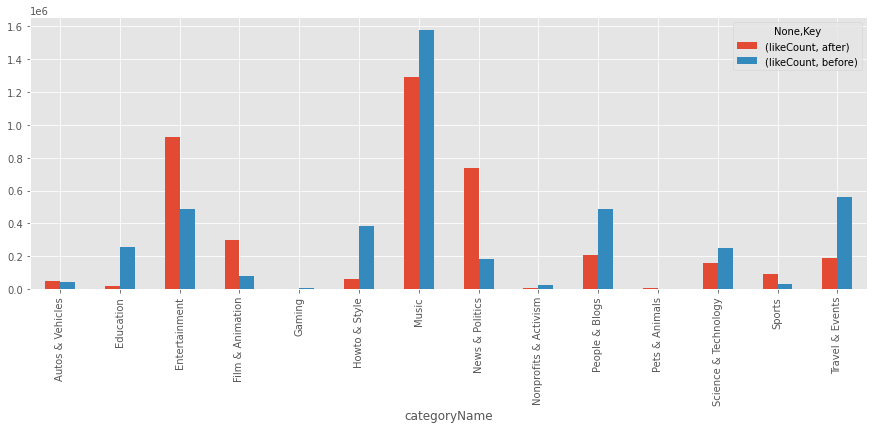

In [270]:
# compare category count according to viewcount
before_like_count['Key'] = 'before'
after_like_count['Key'] = 'after'
before_like_count['likeCount'] = pd.to_numeric(before_like_count['likeCount'])
after_like_count['likeCount'] = pd.to_numeric(after_like_count['likeCount'])

DF = pd.concat([before_like_count, after_like_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

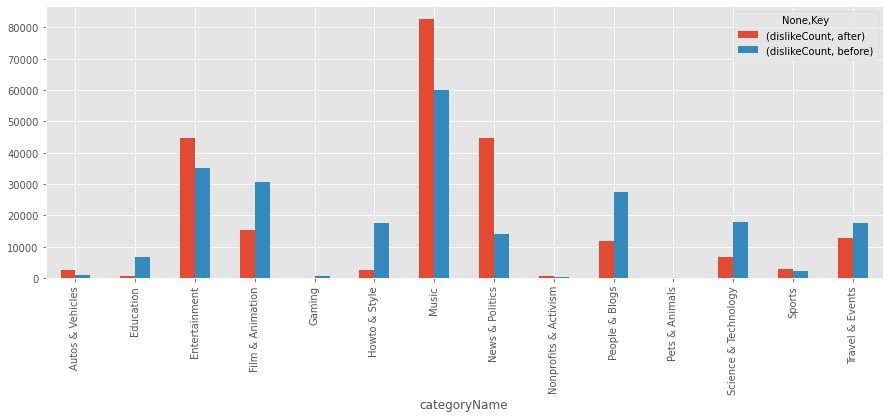

In [272]:
before_dislike_count['Key'] = 'before'
after_dislike_count['Key'] = 'after'
before_dislike_count['dislikeCount'] = pd.to_numeric(before_dislike_count['dislikeCount'])
after_dislike_count['dislikeCount'] = pd.to_numeric(after_dislike_count['dislikeCount'])

DF = pd.concat([before_dislike_count, after_dislike_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

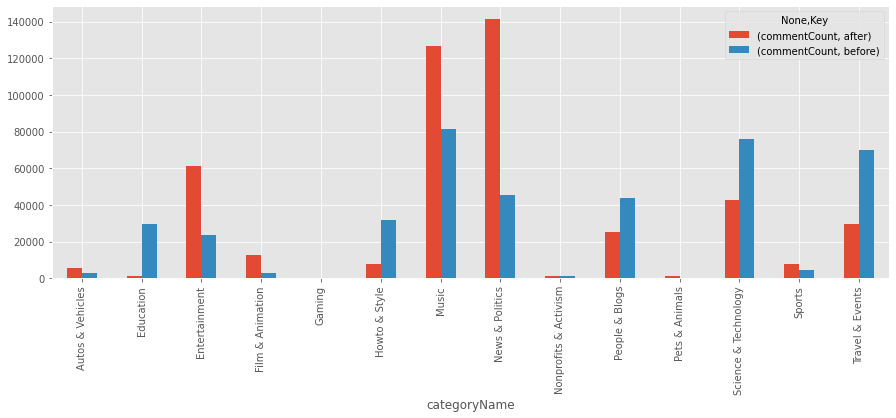

In [273]:
before_comment_count['Key'] = 'before'
after_comment_count['Key'] = 'after'
before_comment_count['commentCount'] = pd.to_numeric(before_comment_count['commentCount'])
after_comment_count['commentCount'] = pd.to_numeric(after_comment_count['commentCount'])

DF = pd.concat([before_comment_count, after_comment_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')